In [43]:
#Here we import all the necessary dependencies
import numpy as np
import matplotlib.pyplot as plt
import time
import amuse.plot as plot
from tqdm import tqdm
from IPython.display import clear_output
from amuse.lab import units, constants
from amuse.ext.orbital_elements import new_binary_from_orbital_elements
from amuse.ext.orbital_elements import get_orbital_elements_from_binary
from amuse.ext.orbital_elements import get_orbital_elements_from_binaries
from amuse.lab import Particles
from amuse.lab import nbody_system
from amuse.couple import bridge
from amuse.lab import Rebound
from amuse.lab import Mercury
from amuse.community.ph4.interface import ph4
from amuse.io import write_set_to_file, read_set_from_file
from amuse.lab import Huayno

In [4]:
data_loc = "Results/"

In [362]:
logtimes = [-1e9,6.698,7.0,7.176,7.301,7.397,7.477,7.544,7.602,7.653,7.698,7.740,7.778,7.812,7.845,7.875,7.903,7.929,7.954,7.977,8]
times = 10**np.array(logtimes)

MWG4_0 = read_set_from_file(data_loc + "MWG_run4_time=-inf.hdf5", format = "hdf5")
MWG4_1 = read_set_from_file(data_loc + "MWG_run4_time=6.698.hdf5", format = "hdf5")
MWG4_2 = read_set_from_file(data_loc + "MWG_run4_time=7.0.hdf5", format = "hdf5")
MWG4_3 = read_set_from_file(data_loc + "MWG_run4_time=7.176.hdf5", format = "hdf5")
MWG4_4 = read_set_from_file(data_loc + "MWG_run4_time=7.301.hdf5", format = "hdf5")
MWG4_5 = read_set_from_file(data_loc + "MWG_run4_time=7.397.hdf5", format = "hdf5")
MWG4_6 = read_set_from_file(data_loc + "MWG_run4_time=7.477.hdf5", format = "hdf5")
MWG4_7 = read_set_from_file(data_loc + "MWG_run4_time=7.544.hdf5", format = "hdf5")
MWG4_8 = read_set_from_file(data_loc + "MWG_run4_time=7.602.hdf5", format = "hdf5")
MWG4_9 = read_set_from_file(data_loc + "MWG_run4_time=7.653.hdf5", format = "hdf5")
MWG4_10 = read_set_from_file(data_loc + "MWG_run4_time=7.698.hdf5", format = "hdf5")
MWG4_11 = read_set_from_file(data_loc + "MWG_run4_time=7.740.hdf5", format = "hdf5")
MWG4_12 = read_set_from_file(data_loc + "MWG_run4_time=7.778.hdf5", format = "hdf5")
MWG4_13 = read_set_from_file(data_loc + "MWG_run4_time=7.812.hdf5", format = "hdf5")
MWG4_14 = read_set_from_file(data_loc + "MWG_run4_time=7.845.hdf5", format = "hdf5")
MWG4_15 = read_set_from_file(data_loc + "MWG_run4_time=7.875.hdf5", format = "hdf5")
MWG4_16 = read_set_from_file(data_loc + "MWG_run4_time=7.903.hdf5", format = "hdf5")
MWG4_17 = read_set_from_file(data_loc + "MWG_run4_time=7.929.hdf5", format = "hdf5")
MWG4_18 = read_set_from_file(data_loc + "MWG_run4_time=7.954.hdf5", format = "hdf5")
MWG4_19 = read_set_from_file(data_loc + "MWG_run4_time=7.977.hdf5", format = "hdf5")
MWG4_20 = read_set_from_file(data_loc + "MWG_run4_final.hdf5", format = "hdf5")

In [29]:
sets = []
for i in range(21):
    exec("sets.append(MWG4_"+str(i)+")")

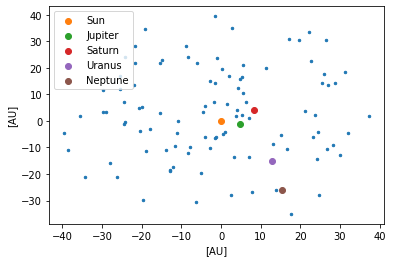

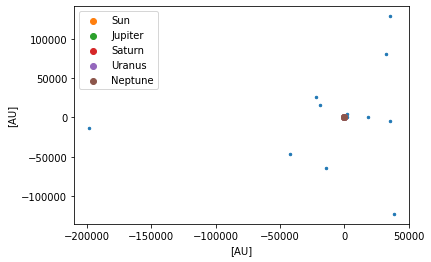

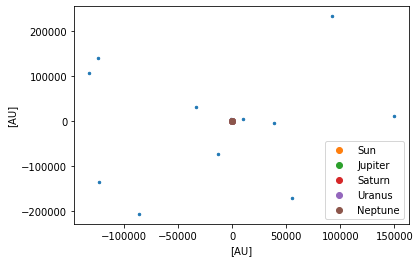

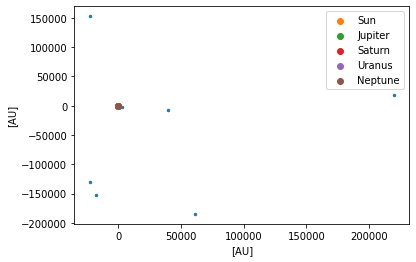

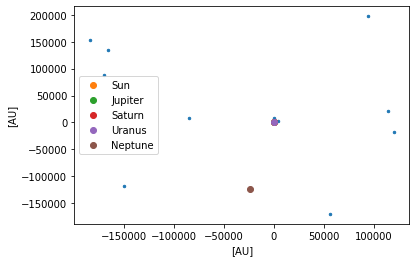

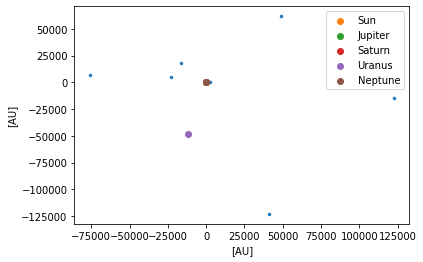

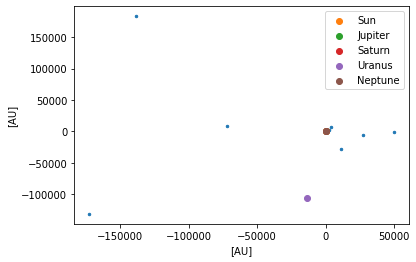

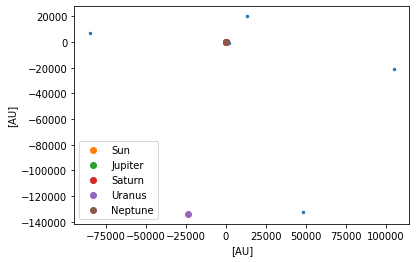

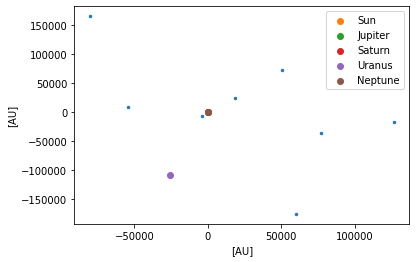

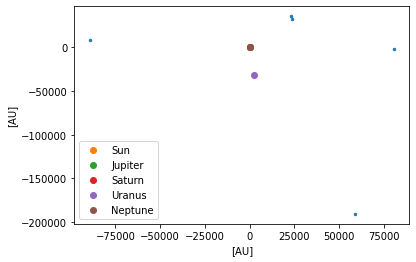

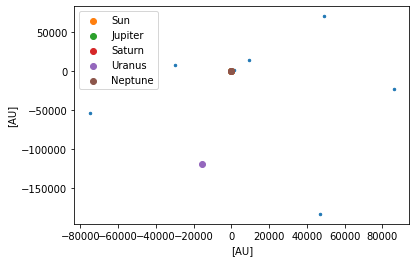

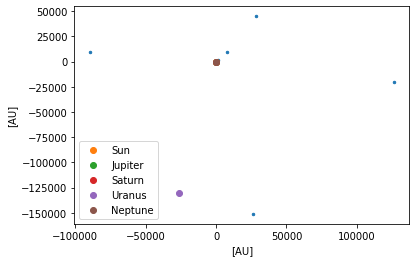

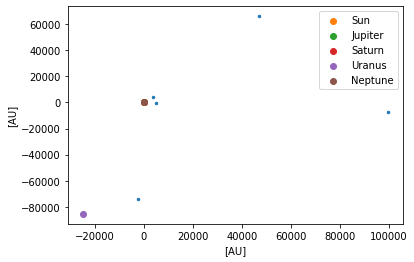

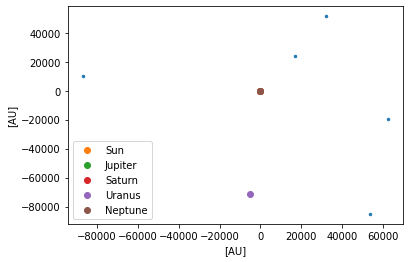

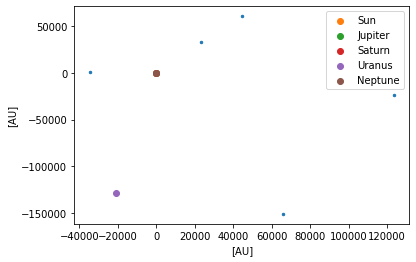

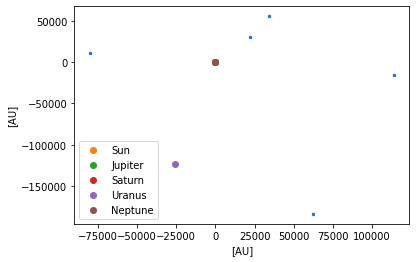

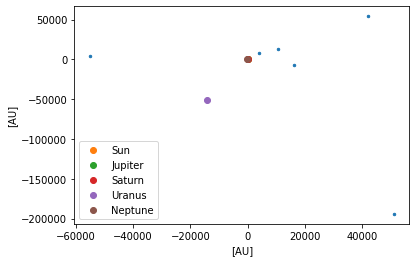

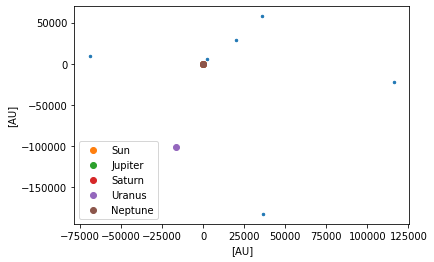

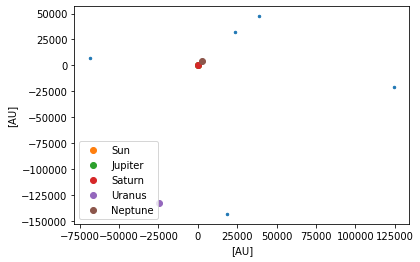

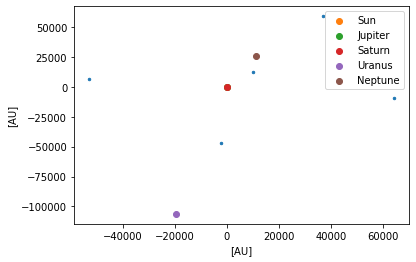

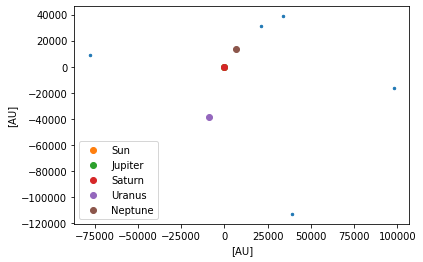

In [38]:
names = ['Sun', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
for particles in sets:
    particles.position -= particles[0].position # Change coordinates of all particles to be centered around the Sun
    plot.scatter(particles.x.in_(units.AU), particles.y.in_(units.AU), s=6)
    for j in range(5):
        plot.scatter(particles[j].x.in_(units.AU), particles[j].y.in_(units.AU), label = names[j])
    plt.legend()
    #plot.xlim(particles[0].x -  (200 | units.AU), particles[0].x + (200 | units.AU))
    #plot.ylim(particles[0].y -  (200 | units.AU), particles[0].y + (200 | units.AU))
    plt.show()

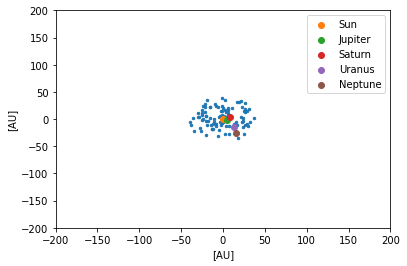

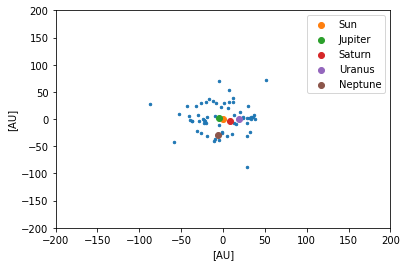

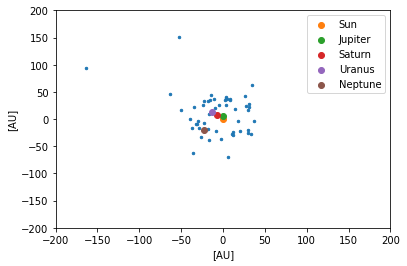

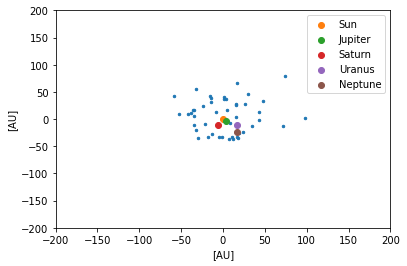

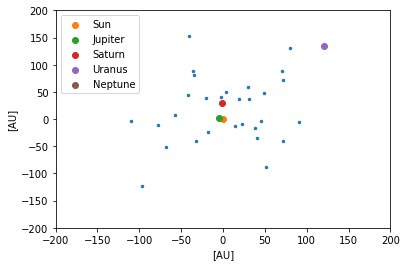

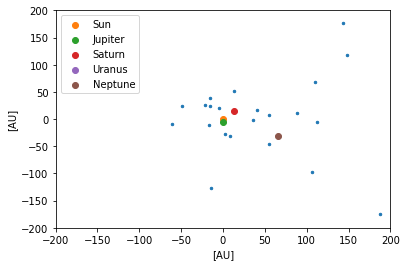

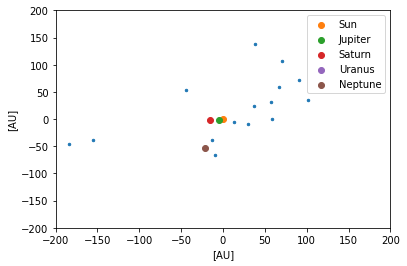

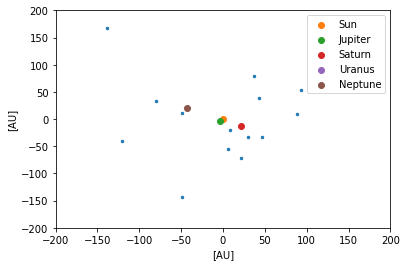

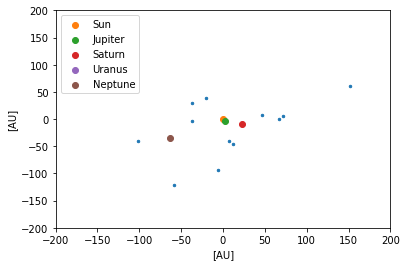

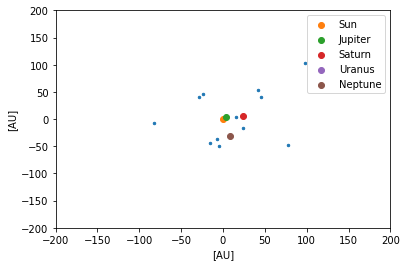

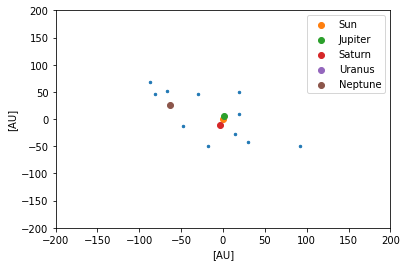

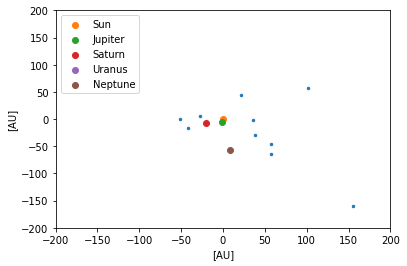

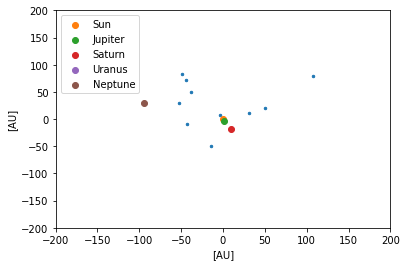

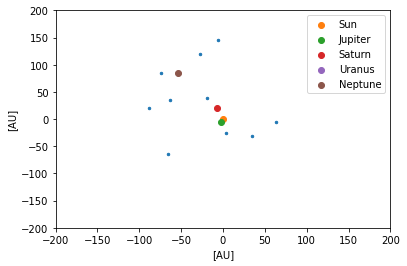

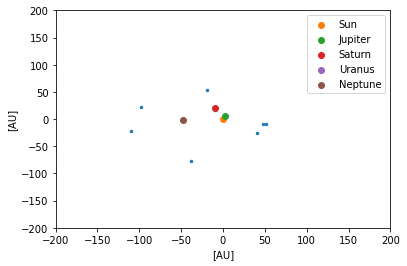

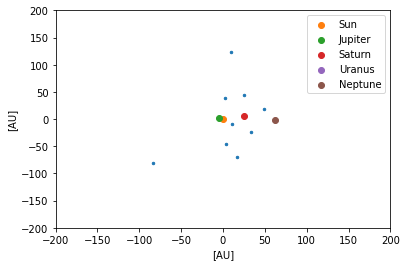

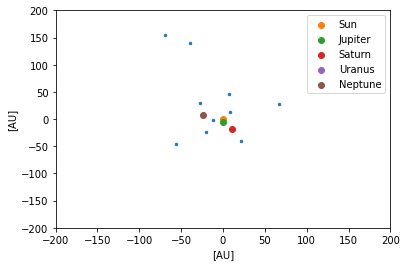

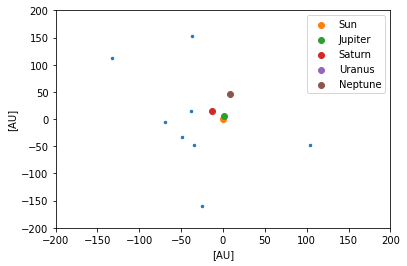

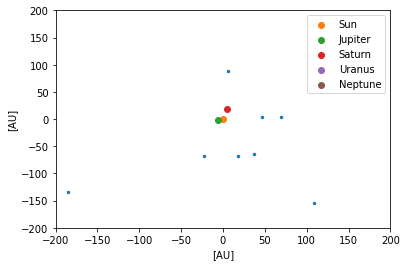

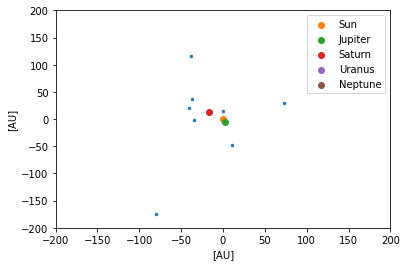

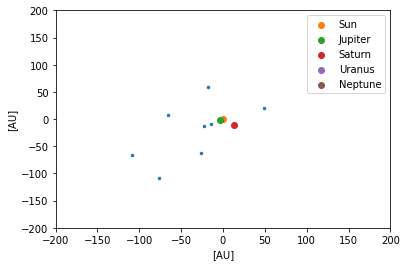

In [39]:
for particles in sets:
    plot.scatter(particles.x.in_(units.AU), particles.y.in_(units.AU), s=6)
    for j in range(5):
        plot.scatter(particles[j].x.in_(units.AU), particles[j].y.in_(units.AU), label = names[j])
    plt.legend()
    plot.xlim(particles[0].x -  (200 | units.AU), particles[0].x + (200 | units.AU))
    plot.ylim(particles[0].y -  (200 | units.AU), particles[0].y + (200 | units.AU))
    plt.show()

In [135]:
def separations(p1, p2):
    return (p1.position - p2.position).length()

def v_esc(M,r):
    return (2*constants.G*M/r).sqrt()

def v_rel(Sun, particles):
    return (Sun.velocity-particles.velocity).length()

def a_orbit(Sun, particles):
    return get_orbital_elements_from_binaries(Sun, particles, constants.G)[2]

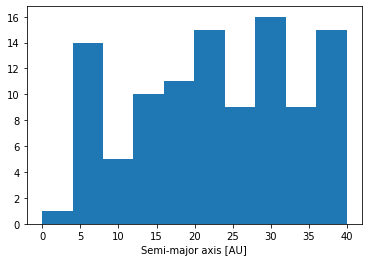

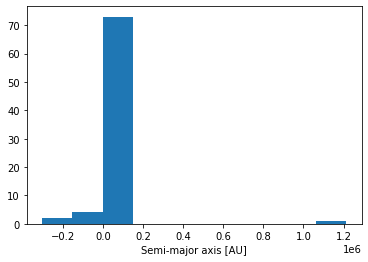

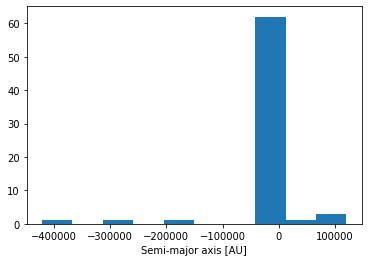

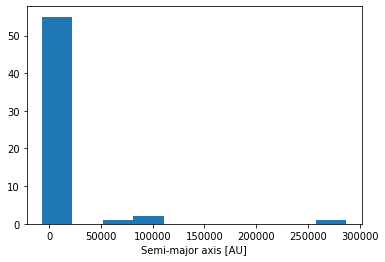

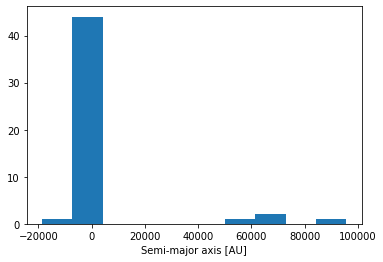

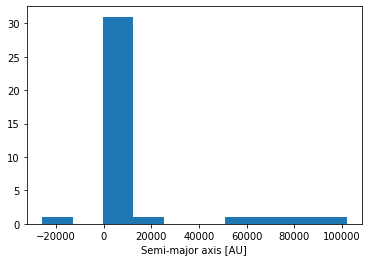

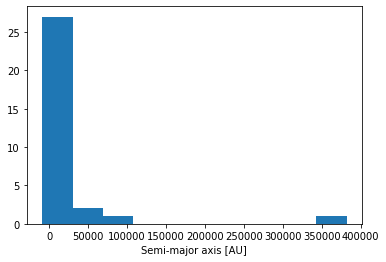

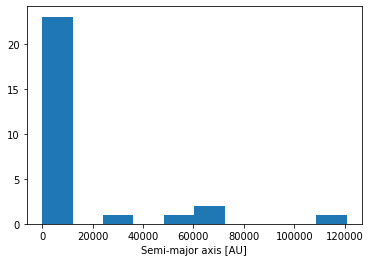

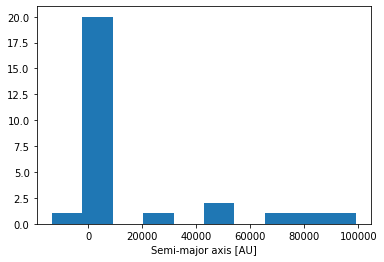

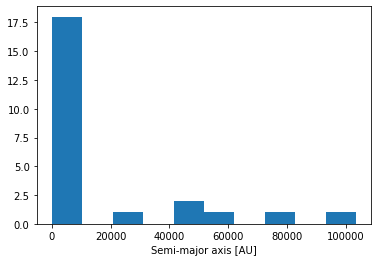

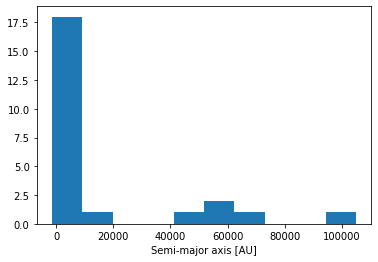

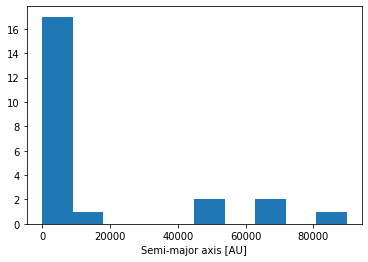

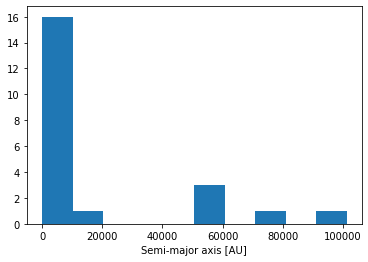

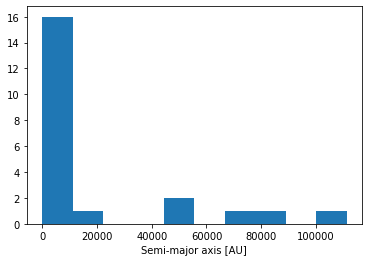

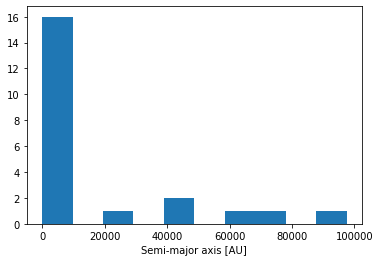

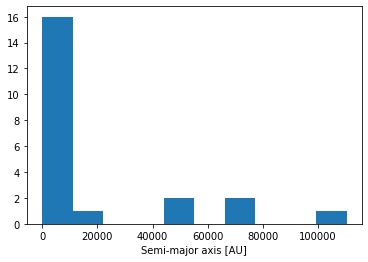

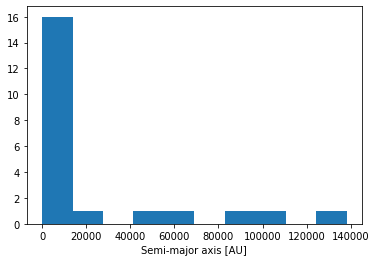

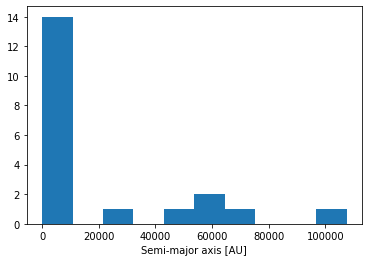

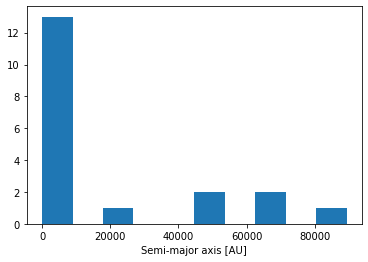

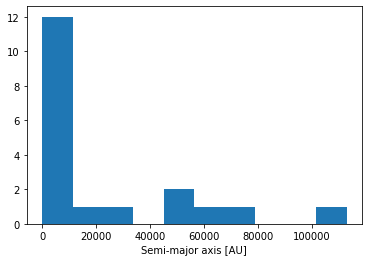

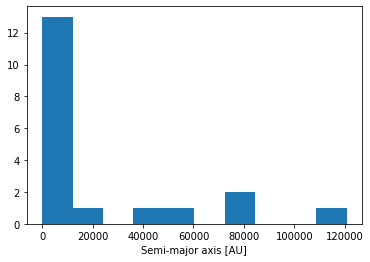

In [52]:
for particles in sets:
    plot.hist(a_orbit(particles[0], particles).in_(units.AU))
    plt.xlabel("Semi-major axis [AU]")
    plt.show()

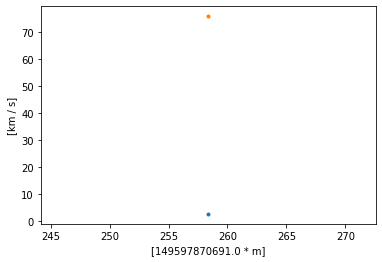

Text(0, 0.5, 'v_esc')

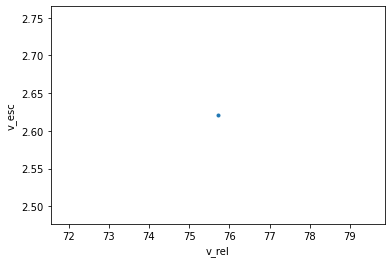

In [136]:
plot.plot(separations(sets[0][0], sets[0][1:]), v_esc(sets[0][0].mass, separations(sets[0][0], sets[0][1:])).in_(units.km/units.s), linewidth=0, marker='.')
plot.plot(separations(sets[0][0], sets[0][1:]), v_rel(sets[0][0], sets[0][1:]).in_(units.km/units.s), linewidth=0, marker='.')
plt.show()
plot.plot(v_rel(sets[0][0], sets[0][1:]).in_(units.km/units.s), v_esc(sets[0][0].mass, separations(sets[0][0], sets[0][1:])).in_(units.km/units.s), linewidth=0, marker='.')
plt.xlabel("v_rel")
plt.ylabel("v_esc")

In [134]:
sets[1].position.in_(units.AU)

quantity<[[0.0, 0.0, 0.0], [-4.72537088394, 2.4466073513, 0.100938151273], [8.51941466331, -4.35638019443, -0.178968764249], [18.8152647018, 0.147291898727, -0.825465384066], [-5.48336577415, -29.3020591438, 0.115424176452], [-8.98190760612, 6.18487197161, 1.13888251046], [-2.46769332886, 22.3531011641, -2.36644106883], [-25.8575105667, 28.8402940929, 0.597390057548], [32.3070294857, -23.3063218594, 0.595400146533], [32716.1436102, 80686.7207419, -2717.80262934], [12.1439654827, 38.7996647358, 4.123982398], [-19.2059934139, -31.29173702, -1.3225725928], [5.36002206802, -30.6231333613, -0.210228138228], [-11.9857664108, 33.8919225335, -1.17395347379], [13.6408634186, -7.63365599513, 4.81737280511], [-32.7321605682, 23.1420886219, 8.02852140824], [24.0004603863, 2.14536455274, -1.9824186264], [-41834.4205241, -46050.7180864, 20697.1081933], [-10.3350470066, -40.6384039819, 9.16493176569], [12.5535469055, 31.7780045271, -2.67745561214], [33.6862254143, -0.386274963617, -1.10722149586], [1

In [148]:
def eccentricities(Sun, particles):
    return get_orbital_elements_from_binaries(Sun, particles, constants.G)[3]

In [149]:
eccentricities(sets[0][0], sets[0])

array([        nan,  0.04830883,  0.05393888,  0.04294568,  0.01079598,
        0.0071977 ,  0.00875674,  0.03460012,  0.04294694,  0.0263102 ,
        0.03055953,  0.04909167,  0.03842869,  0.01575801,  0.0371579 ,
        0.0280056 ,  0.01378419,  0.01245081,  0.01652663,  0.02362658,
        0.02528862,  0.0125549 ,  0.02631533,  0.030663  ,  0.00276204,
        0.04404534,  0.04983175,  0.00473398,  0.02324076,  0.01673003,
        0.04759012,  0.00765655,  0.04566329,  0.01133115,  0.03266115,
        0.04603263,  0.01361301,  0.04347468,  0.01241035,  0.05301822,
        0.0258237 ,  0.00710585,  0.0208485 ,  0.03002392,  0.00448221,
        0.01385575,  0.0131575 ,  0.03615171,  0.03740119,  0.03189689,
        0.01118533,  0.03011554,  0.01738781,  0.02566137,  0.01789297,
        0.01274804,  0.02128907,  0.0177516 ,  0.03416965,  0.01655726,
        0.03177962,  0.03652272,  0.02353155,  0.03887229,  0.03808201,
        0.01011693,  0.00995099,  0.02845663,  0.00677212,  0.03

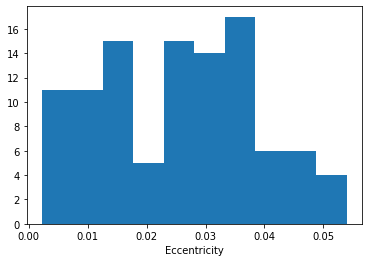

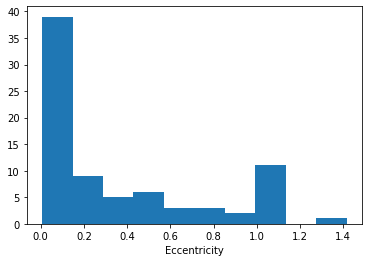

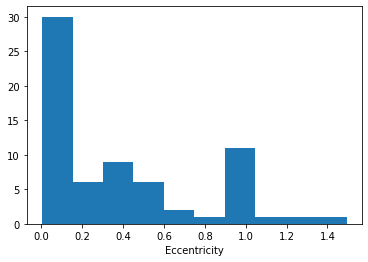

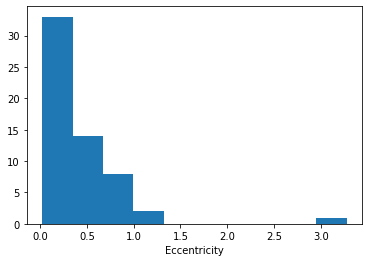

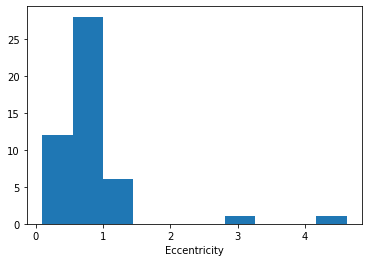

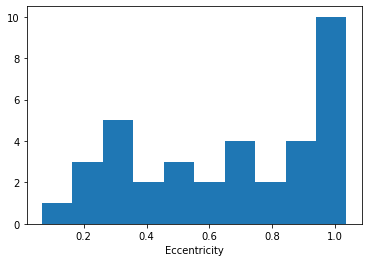

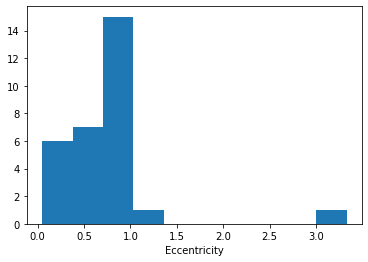

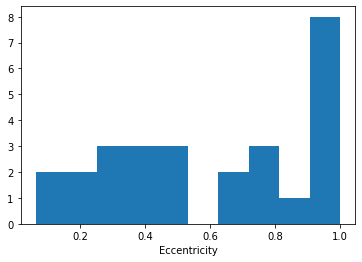

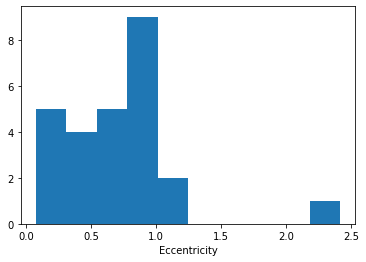

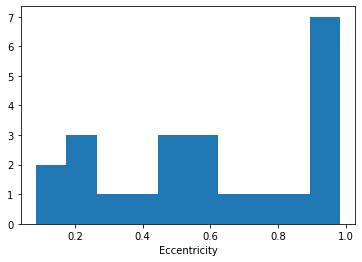

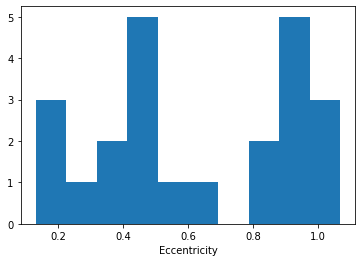

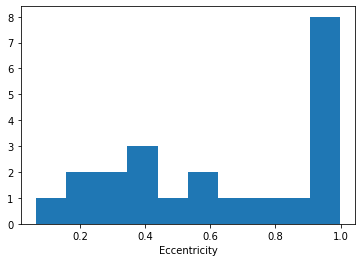

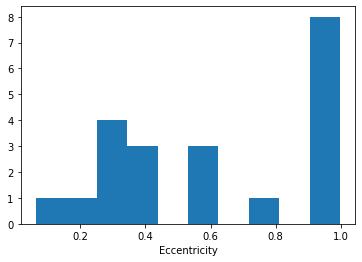

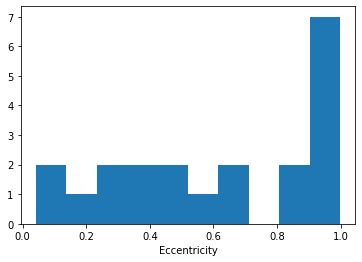

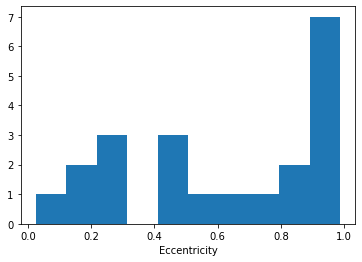

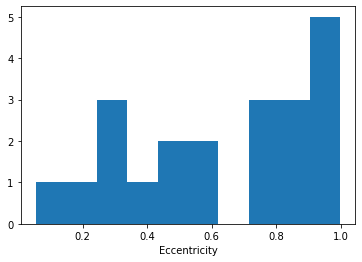

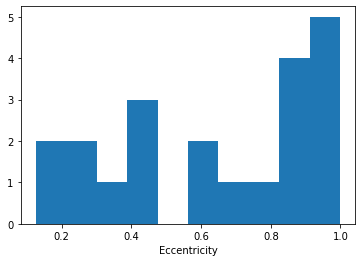

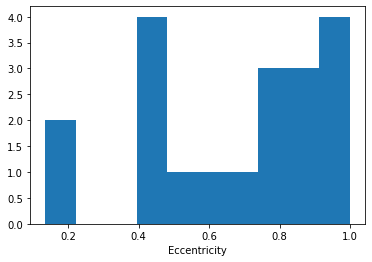

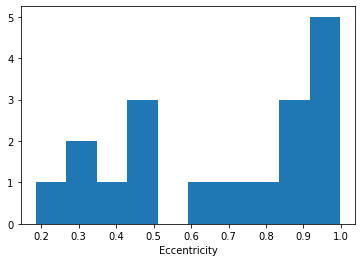

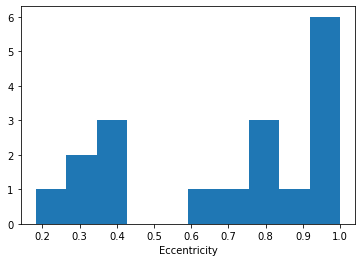

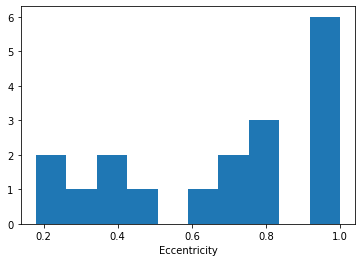

In [150]:
for particles in sets:
    plot.hist(eccentricities(particles[0], particles[1:]))
    plt.xlabel("Eccentricity")
    plt.show()

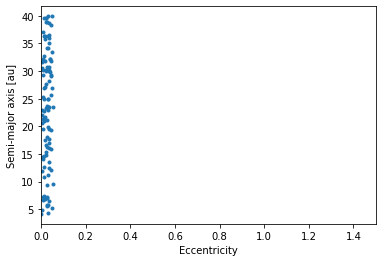

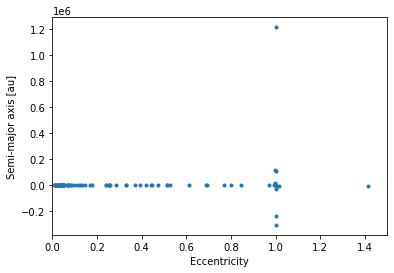

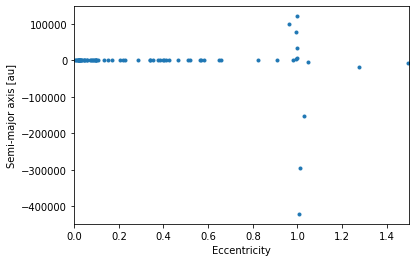

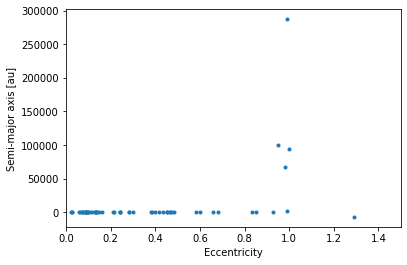

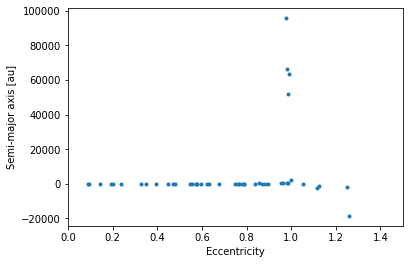

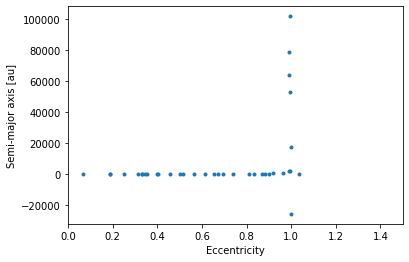

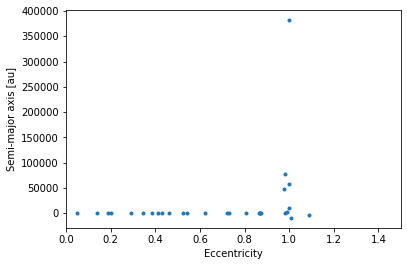

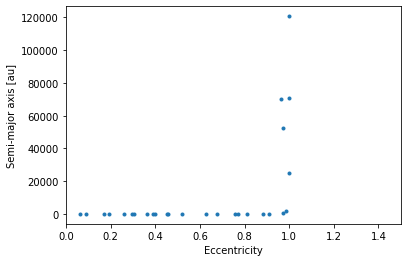

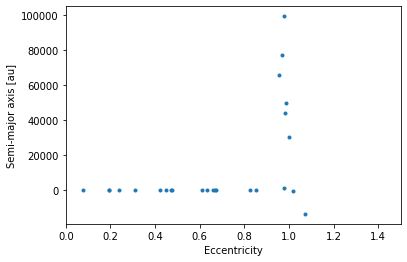

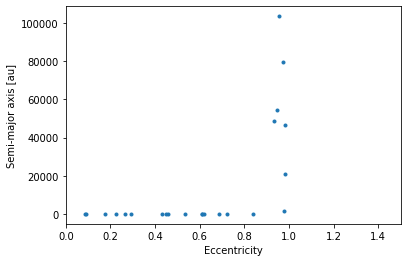

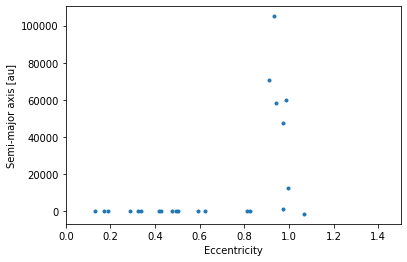

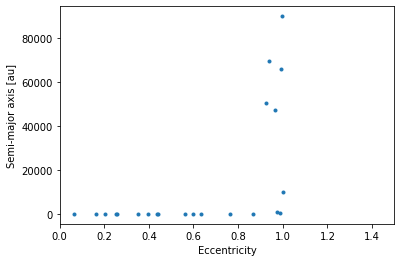

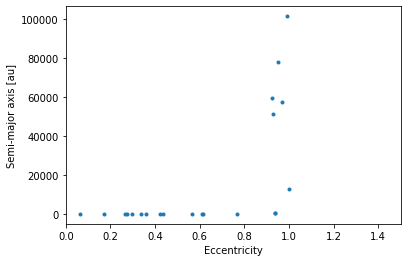

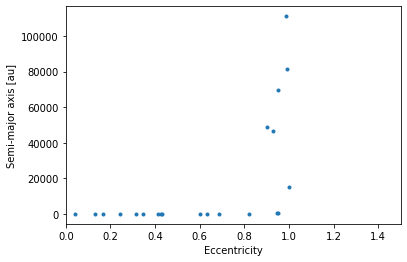

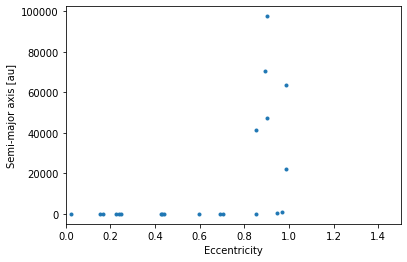

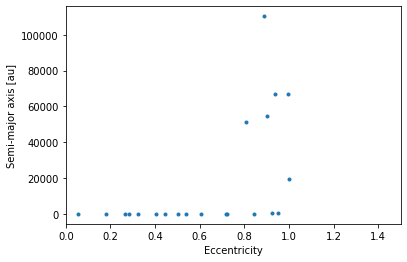

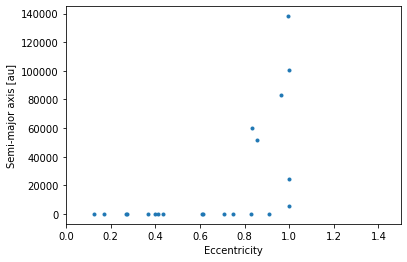

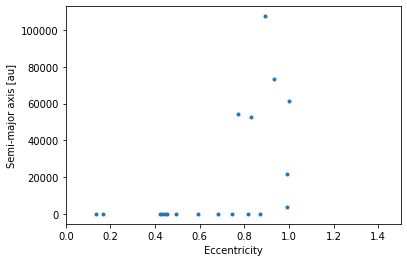

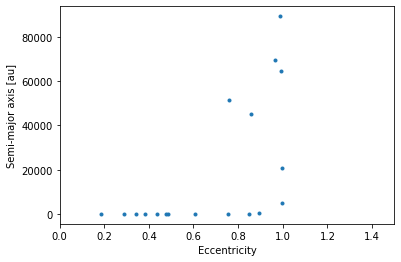

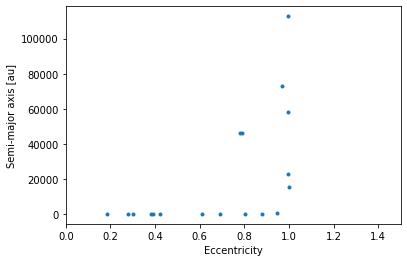

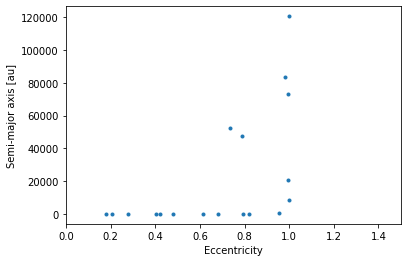

In [164]:
for particles in sets:
    plot.plot(eccentricities(particles[0], particles[1:]), a_orbit(particles[0], particles[1:]).in_(units.AU), linewidth=0, marker='.')
    plt.xlabel("Eccentricity")
    plt.ylabel("Semi-major axis [au]")
    plt.xlim(0, 1.5)
    #plt.ylim(0, 1000)
    plt.show()

In [376]:
# Find particles that have e < 0.9 and a > 2000 AU
oort_objs = np.argwhere((eccentricities(sets[20][0], sets[20][1:]) < 0.9) & (a_orbit(sets[20][0], sets[20][1:]) > 2000 |units.AU))
print("Particles that have non-hyperbolic orbits and have a semi-major axis belonging to Oort cloud objects:")
oort_obj_names = []
for i in oort_objs:
    oort_obj_names.append(sets[20][i][0].name)
    print(oort_obj_names[-1])

Particles that have non-hyperbolic orbits and have a semi-major axis belonging to Oort cloud objects:
OORT_59
OORT_60


['OORT_59' 'OORT_60']
['OORT_59' 'OORT_60']
['OORT_59' 'OORT_60']
['OORT_59' 'OORT_60']
['OORT_59' 'OORT_60']
['OORT_59' 'OORT_60']
['OORT_59' 'OORT_60']
['OORT_59' 'OORT_60']
['OORT_59' 'OORT_60']
['OORT_59' 'OORT_60']
['OORT_59' 'OORT_60']
['OORT_59' 'OORT_60']
['OORT_59' 'OORT_60']
['OORT_59' 'OORT_60']
['OORT_59' 'OORT_60']
['OORT_59' 'OORT_60']
['OORT_59' 'OORT_60']
['OORT_59' 'OORT_60']
['OORT_59' 'OORT_60']
['OORT_59' 'OORT_60']
['OORT_59' 'OORT_60']


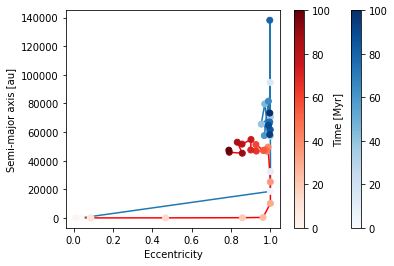

In [374]:
eccs = []
semimajoraxes = []
for particles in sets:
    indices = []
    for oort in oort_obj_names:
        indices.append(np.where(particles.name == oort)[0][0])
    p_subset = particles[indices]
    print(p_subset.name)
    eccs.append(eccentricities(particles[0], p_subset))
    semimajoraxes.append(a_orbit(particles[0], p_subset).in_(units.AU).number) # .number is necessary here to plot

eccs, semimajoraxes = np.array(eccs).T, np.array(semimajoraxes).T
plot.scatter(eccs[0], semimajoraxes[0], label=oort_obj_names[0], c=times/1e6, cmap='Blues')
plot.plot(eccs[0], semimajoraxes[0], zorder=-1, color='C0')
plt.colorbar()
plot.scatter(eccs[1], semimajoraxes[1], label=oort_obj_names[1], c=times/1e6, cmap='Reds')
plot.plot(eccs[1], semimajoraxes[1], zorder=-1, color='red')
plt.xlabel("Eccentricity")
plt.ylabel("Semi-major axis [au]")
plt.colorbar(label="Time [Myr]")
plt.show()